# Machine Learning for Core Engineering Disciplines

**Instructor**:
Prof. Ananth Govind Rajan  
Department of Chemical Engineering  
Indian Institute of Science, Bengaluru  
Email: ananthgr@iisc.ac.in  
Website: https://agrgroup.org

**Teaching Assistants**:
Dr. Manas Sharma, Shivam Chaturvedi, Manasi Lavhekar, Amar Krishna Gopinath 

## 3. Unsupervised machine learning with Python

This tutorial demonstrates various unsupervised learning techniques including:
- **Principal component analysis (PCA)** for dimensionality reduction
- **k-means clustering** for partitioning data
- **DBSCAN** for density-based clustering
- **t-SNE and UMAP** for nonlinear dimensionality reduction and visualization

We will work with the famous Iris dataset, which consists of 50 samples from three different species of Iris flowers, to explore these concepts. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
plt.style.use('default')
sns.set_palette("husl")

### Data loading and exploration

The Iris dataset contains 150 samples of Iris flowers with:
- 4 features (sepal length, sepal width, petal length, petal width)
- 3 species (Setosa, Versicolor, Virginica)

In [2]:
from sklearn.datasets import load_iris
# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

print("Dataset shape:", X.shape)
print("Desired classes:", iris.target_names)
print("\nFirst few rows:")
print(X.head())

Dataset shape: (150, 4)
Desired classes: ['setosa' 'versicolor' 'virginica']

First few rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


### Train-test split and standardization

Recall from the class that PCA is most effective when we scale the features. StandardScaler transforms features to have mean=0 and std=1. We fit the scaler only on training data to avoid data leakage.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Split data first
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=38) #, stratify=y)

# Fit scaler only on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set shape:", X_train_scaled.shape)
print("Test set shape:", X_test_scaled.shape)

Training set shape: (105, 4)
Test set shape: (45, 4)


### 3.1 Principal component analysis (PCA)

PCA finds directions of maximum variance in the data.
As taught in the class, one can carry out PCA to attempt linear dimensionality reduction, i.e., reduce the number of independent variables (features) required to train a machine learning model for the dataset. The following code carries out PCA on the available data in the Iris dataset and produces a 2D plot of the first and second principal components that describe the highest extent of variation in the dataset. Note that we ask Scikit-learn to produce the first 4 principal components.

**What is PCA?**
- A dimensionality reduction technique that finds the directions (principal components) of maximum variance
- Components are orthogonal and ordered by explained variance
- Useful for visualization, noise reduction, and feature compression

**Key Concepts:**
- **Explained variance ratio**: How much variance each component captures
- **Cumulative variance**: Total variance explained by first n components
- **Loadings**: How original features contribute to each component

In [4]:
from sklearn.decomposition import PCA
# Perform PCA
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative explained variance:", np.sum(pca.explained_variance_ratio_))

Explained variance ratio: [0.73989576 0.21517981 0.03968045 0.00524398]
Cumulative explained variance: 1.0


One can also plot the percentage of variance in the data explained by each principal component.
### PCA variance analysis - scree plot

A **scree plot** helps determine how many components to keep:
- **Left plot**: Individual variance explained by each component
- **Right plot**: Cumulative variance explained

**Rule of thumb**: Keep components until you reach 80-95% cumulative variance, or look for an "elbow" in the scree plot.

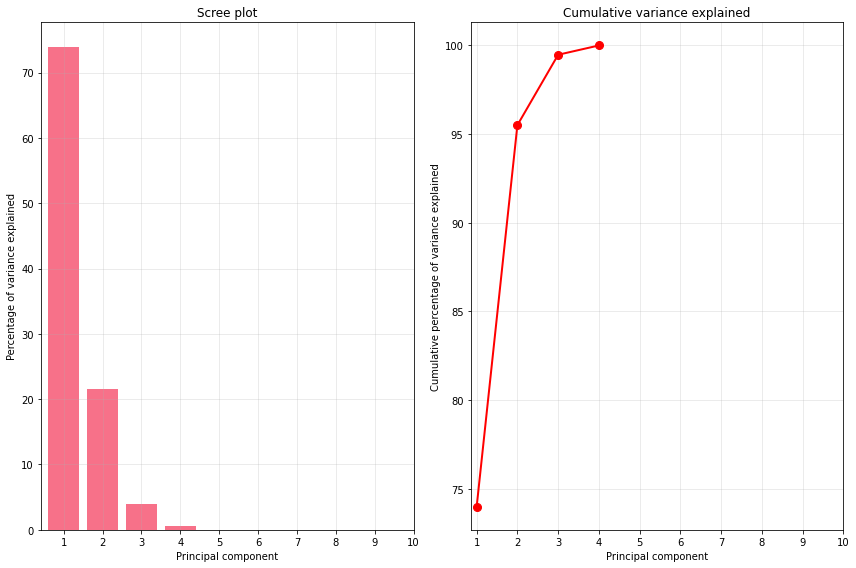

In [5]:
# Plot the percentage of variance explained by each principal component (scree plot)
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.bar(range(1, 5), pca.explained_variance_ratio_ * 100)
plt.xlabel('Principal component')
plt.ylabel('Percentage of variance explained')
plt.title('Scree plot')
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 11))

plt.subplot(1, 2, 2)
plt.plot(range(1, 5), np.cumsum(pca.explained_variance_ratio_) * 100, 'ro-', linewidth=2, markersize=8)
plt.xlabel('Principal component')
plt.ylabel('Cumulative percentage of variance explained')
plt.title('Cumulative variance explained')
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 11))

plt.tight_layout()
plt.show()

### PCA visualization - different component pairs

**Interpreting PCA plots:**
- Each point represents one sample in the reduced space
- Colors represent the flower type, which we already know in this case. However, we may or may not know the classes in other realworld use cases for unsupervised learning
- **First few components** capture the most variance and often show clear patterns
- **Later components** capture less variance but may reveal subtle relationships

Let's examine different component pairs to understand the data structure:

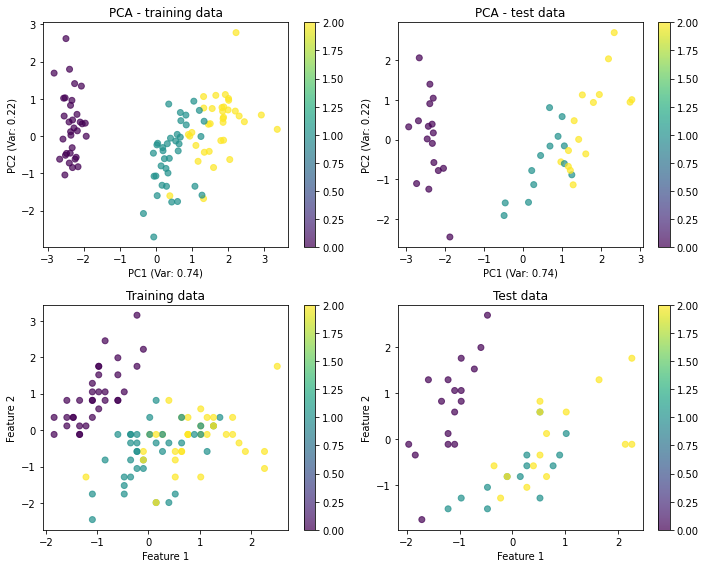

In [6]:
# Visualize PCA results for PC1 and PC2
plt.figure(figsize=(10, 8))

# Training data
plt.subplot(2, 2, 1)
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.7)
plt.xlabel(f'PC1 (Var: {pca.explained_variance_ratio_[0]:.2f})')
plt.ylabel(f'PC2 (Var: {pca.explained_variance_ratio_[1]:.2f})')
plt.title('PCA - training data')
plt.colorbar(scatter)

# Test data
plt.subplot(2, 2, 2)
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis', alpha=0.7)
plt.xlabel(f'PC1 (Var: {pca.explained_variance_ratio_[0]:.2f})')
plt.ylabel(f'PC2 (Var: {pca.explained_variance_ratio_[1]:.2f})')
plt.title('PCA - test data')
plt.colorbar(scatter)

# Training data
plt.subplot(2, 2, 3)
scatter = plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap='viridis', alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training data')
plt.colorbar(scatter)

# Test data
plt.subplot(2, 2, 4)
scatter = plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, cmap='viridis', alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Test data')
plt.colorbar(scatter)

plt.tight_layout()
plt.show()

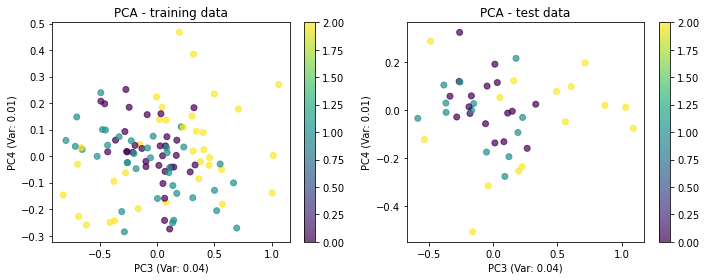

In [7]:
# Visualize PCA results for PC3 and PC4
plt.figure(figsize=(10, 4))

# Training data
plt.subplot(1, 2, 1)
scatter = plt.scatter(X_train_pca[:, 2], X_train_pca[:, 3], c=y_train, cmap='viridis', alpha=0.7)
plt.xlabel(f'PC3 (Var: {pca.explained_variance_ratio_[2]:.2f})')
plt.ylabel(f'PC4 (Var: {pca.explained_variance_ratio_[3]:.2f})')
plt.title('PCA - training data')
plt.colorbar(scatter)

# Test data
plt.subplot(1, 2, 2)
scatter = plt.scatter(X_test_pca[:, 2], X_test_pca[:, 3], c=y_test, cmap='viridis', alpha=0.7)
plt.xlabel(f'PC3 (Var: {pca.explained_variance_ratio_[2]:.2f})')
plt.ylabel(f'PC4 (Var: {pca.explained_variance_ratio_[3]:.2f})')
plt.title('PCA - test data')
plt.colorbar(scatter)

plt.tight_layout()
plt.show()

### Key insight: importance of later principal components

**What do you infer from the above plots regarding the importance of later principal components?**

The later principal components explain progressively less variance in the data. This is expected because:

1. **First few components** capture the major patterns and relationships
2. **Later components** often represent noise or very specific, minor variations
3. **Diminishing returns**: Each subsequent component adds less new information
4. **Practical implication**: Often we can use just the first few components for most applications

### 3.2 k-means clustering - finding optimal k

**k-means** clustering is the simplest form of clustering in ML. This algorithm can be used to determine if there are similarities between certain points in the dataset.

- Divides data into k clusters
- Minimizes the within-cluster sum of squares (WCSS)
- Intuitively, it results in roughly spherical clusters of similar size

**Elbow method** helps find optimal k:
- Plot WCSS vs. number of clusters
- Look for the "elbow" where additional clusters don't significantly reduce WCSS
- Balance between model complexity and performance

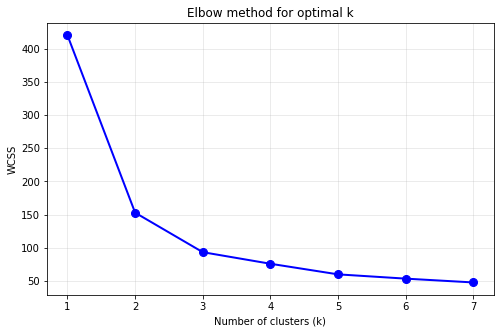

In [8]:
from sklearn.cluster import KMeans
# Elbow method for optimal k
wcss = []
k_range = range(1, 8)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=23, n_init=10)
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow method for optimal k')
plt.grid(True, alpha=0.3)
plt.show()

### k-means clustering implementation

Based on the elbow plot, we choose k=3 as it appears to be the optimal number of clusters. Let us now analyze the:
- **Cluster distribution**: how many points in each cluster
- **Cluster centers**: the centroid of each cluster
- **Final WCSS**: the objective function value we minimized

In [9]:
# Apply k-means with k=3 (we know Iris has 3 species)
kmeans = KMeans(n_clusters=3, random_state=37, n_init='auto')
train_clusters = kmeans.fit_predict(X_train_scaled)
test_clusters = kmeans.predict(X_test_scaled)

print(f"Training clusters distribution: {np.bincount(train_clusters)}")
print(f"Test clusters distribution: {np.bincount(test_clusters)}")

Training clusters distribution: [32 33 40]
Test clusters distribution: [13 17 15]


### k-means visualization

**Feature space plot**: shows clusters in the original feature space (first two features)
- Helps understand how clusters separate in the input space
- Each color represents a different cluster

**PCA space plot**: shows clusters in the PCA components space (first two components)
- Helps understand how clusters separate in the PC space
- Each color represents a different cluster

**Target space plot**: shows clusters in the target variable space
- Reveals if clusters correspond to different ranges of target values
- Useful for understanding if clustering captures meaningful patterns

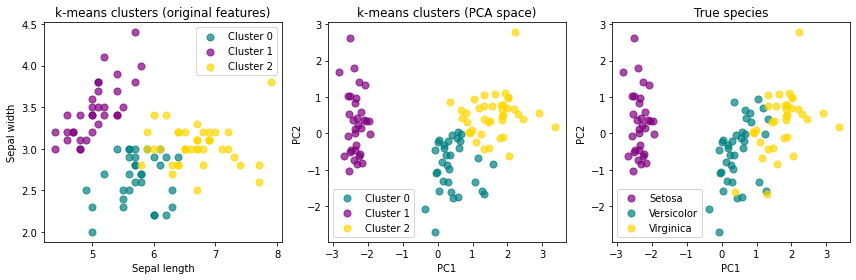

In [10]:
plt.figure(figsize=(12, 4))

# Define class colors and labels (Iris species)
species_colors = ['purple', 'teal', 'gold']
species_labels = ['Setosa', 'Versicolor', 'Virginica']

# Get unique cluster IDs
unique_clusters = np.unique(train_clusters)
cluster_colors = ['teal', 'purple', 'gold']

# Subplot 1: k-means clusters (original features)
plt.subplot(1, 3, 1)
for cluster, color in zip(unique_clusters, cluster_colors):
    plt.scatter(
        X_train.iloc[train_clusters == cluster, 0],
        X_train.iloc[train_clusters == cluster, 1],
        c=[color], label=f"Cluster {cluster}", alpha=0.7, s=50
    )
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('k-means clusters (original features)')
plt.legend()

# Subplot 2: k-means clusters (PCA space)
plt.subplot(1, 3, 2)
for cluster, color in zip(unique_clusters, cluster_colors):
    plt.scatter(
        X_train_pca[train_clusters == cluster, 0],
        X_train_pca[train_clusters == cluster, 1],
        c=[color], label=f"Cluster {cluster}", alpha=0.7, s=50
    )
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('k-means clusters (PCA space)')
plt.legend()

# Subplot 3: true species
plt.subplot(1, 3, 3)
for cls, color, label in zip(np.unique(y_train), species_colors, species_labels):
    plt.scatter(
        X_train_pca[y_train == cls, 0],
        X_train_pca[y_train == cls, 1],
        c=color, label=label, alpha=0.7, s=50
    )
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('True species')
plt.legend()

plt.tight_layout()
plt.show()


### 3.3 DBSCAN - density-based clustering

**DBSCAN (density-based spatial clustering of applications with noise)** differs from k-means:
- **No need to specify number of clusters** beforehand
- **Can find clusters of arbitrary shape** (not just spherical)
- **Identifies noise points** (outliers)
- **Density-based**: Groups together points in high-density areas

**Key parameters:**
- **eps**: Maximum distance between two samples to be considered neighbors
- **min_samples**: Minimum number of samples in a neighborhood to form a cluster

### DBSCAN parameter selection - k-distance graph

**Choosing eps parameter** is crucial for DBSCAN:
- **k-distance graph**: plot distances to k-th nearest neighbor for all points
- **Look for the "elbow"**: sharp increase indicates transition from dense to sparse regions
- **eps value**: choose the distance at the elbow point

**Why this works:**
- Points in clusters have consistent internal density (small k-distances)
- Points near boundaries or noise show a jump in distance
- The elbow represents the optimal density threshold

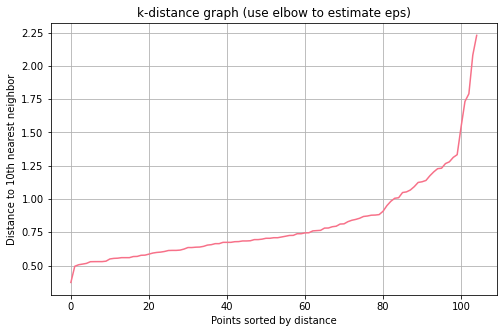

In [11]:
from sklearn.neighbors import NearestNeighbors

k = 10
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X_train_scaled)
distances, indices = neighbors_fit.kneighbors(X_train_scaled)

# Get distances to k-th nearest neighbor
distances = np.sort(distances[:, k-1])
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.xlabel("Points sorted by distance")
plt.ylabel("Distance to 10th nearest neighbor")
plt.title("k-distance graph (use elbow to estimate eps)")
plt.grid(True)
plt.show()

### DBSCAN with optimized parameters

Based on the k-distance graph, we choose eps=1.25. This value should:
- Capture the main density regions as clusters
- Separate sparse regions as noise
- Balance between too many small clusters and too few large ones

In [12]:
from sklearn.cluster import DBSCAN
# Apply DBSCAN
dbscan = DBSCAN(eps=1.25, min_samples=10)
dbscan_clusters = dbscan.fit_predict(X_train_scaled)

print(f"DBSCAN found {len(set(dbscan_clusters)) - (1 if -1 in dbscan_clusters else 0)} clusters")
print(f"Number of noise points: {list(dbscan_clusters).count(-1)}")
print(f"Cluster distribution: {np.bincount(dbscan_clusters[dbscan_clusters >= 0])}")

DBSCAN found 2 clusters
Number of noise points: 1
Cluster distribution: [71 33]


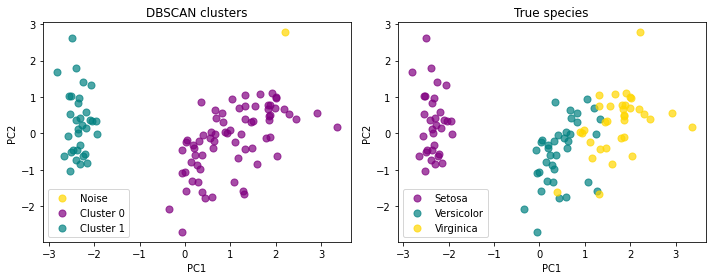

In [13]:
plt.figure(figsize=(10, 4))

# Define colors and labels for species (assuming y_train in [0, 1, 2])
species_colors = ['purple', 'teal', 'gold']
species_labels = ['Setosa', 'Versicolor', 'Virginica']

# Unique DBSCAN cluster labels (may include -1 for noise)
unique_clusters = np.unique(dbscan_clusters)
cluster_colors = cluster_colors = ['gold', 'purple', 'teal']

# Plot DBSCAN Clusters
plt.subplot(1, 2, 1)
for cluster, color in zip(unique_clusters, cluster_colors):
    label = f"Cluster {cluster}" if cluster != -1 else "Noise"
    plt.scatter(
        X_train_pca[dbscan_clusters == cluster, 0],
        X_train_pca[dbscan_clusters == cluster, 1],
        c=[color], label=label, alpha=0.7, s=50
    )
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('DBSCAN clusters')
plt.legend()

# Plot True Species
plt.subplot(1, 2, 2)
for cls, color, label in zip(np.unique(y_train), species_colors, species_labels):
    plt.scatter(
        X_train_pca[y_train == cls, 0],
        X_train_pca[y_train == cls, 1],
        c=color, label=label, alpha=0.7, s=50
    )
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('True species')
plt.legend()

plt.tight_layout()
plt.show()


### DBSCAN demonstration with synthetic data

Now let's apply DBSCAN with a reasonable eps value and see how well it recovers the original clusters.

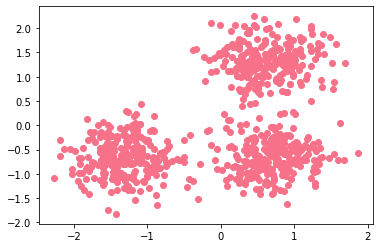

In [14]:
from sklearn.datasets import make_blobs

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [15]:
db = DBSCAN(eps=0.31, min_samples=10).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 16


### Understanding eps parameter selection

**eps** is the maximum distance between two points to consider them neighbors. Setting it:
- **Too small** = too many small clusters
- **Too large** = one big blob

Since we do not know the right eps, this code helps us choose it by plotting the distance to each point's k-th nearest neighbor. The idea is that clusters have consistent internal density, so their k-nearest distances will be small — while points near boundaries or noise will show a jump.

**The Strategy**: Look for the "elbow" in the k-distance graph - that's the optimal eps

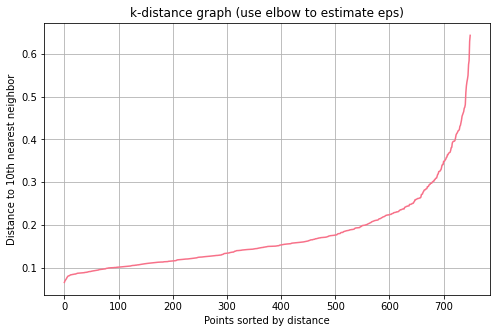

In [16]:
from sklearn.neighbors import NearestNeighbors
k = 10
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# Get distances to k-th nearest neighbor
distances = np.sort(distances[:, k-1])
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.xlabel("Points sorted by distance")
plt.ylabel("Distance to 10th nearest neighbor")
plt.title("k-distance graph (use elbow to estimate eps)")
plt.grid(True)
plt.show()

In [17]:
db = DBSCAN(eps=0.31, min_samples=10).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 16


### Final DBSCAN visualization

Now let's visualize our final DBSCAN results with the optimized parameters. Notice how DBSCAN identifies:
- **Core points** (large circles): Points with enough neighbors within eps distance
- **Border points** (small circles): Points within eps of a core point but don't have enough neighbors themselves
- **Noise points** (black): Points that don't belong to any cluster

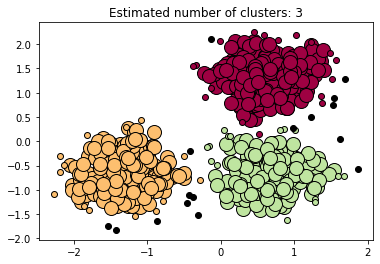

In [18]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

### 3.4 t-SNE: nonlinear dimensionality reduction

**t-SNE (t-Distributed Stochastic Neighbor Embedding)** is a powerful technique for visualizing high-dimensional data:

### What t-SNE does:
- **Reduces dimensions** while preserving local structure
- **Nonlinear**: Can capture complex relationships that PCA misses
- **Great for visualization**: Especially good at revealing clusters

### Key Parameter - perplexity:
- **Think of it as**: "How many neighbors should each point consider?"
- **Low perplexity (5-10)**: Focuses on very local structure
- **High perplexity (30-50)**: Considers more global structure
- **Rule of thumb**: Try values between 5 and 50

Let's see how different perplexity values affect our visualization:

Computing t-SNE with perplexity=5...
Computing t-SNE with perplexity=10...
Computing t-SNE with perplexity=30...
Computing t-SNE with perplexity=50...


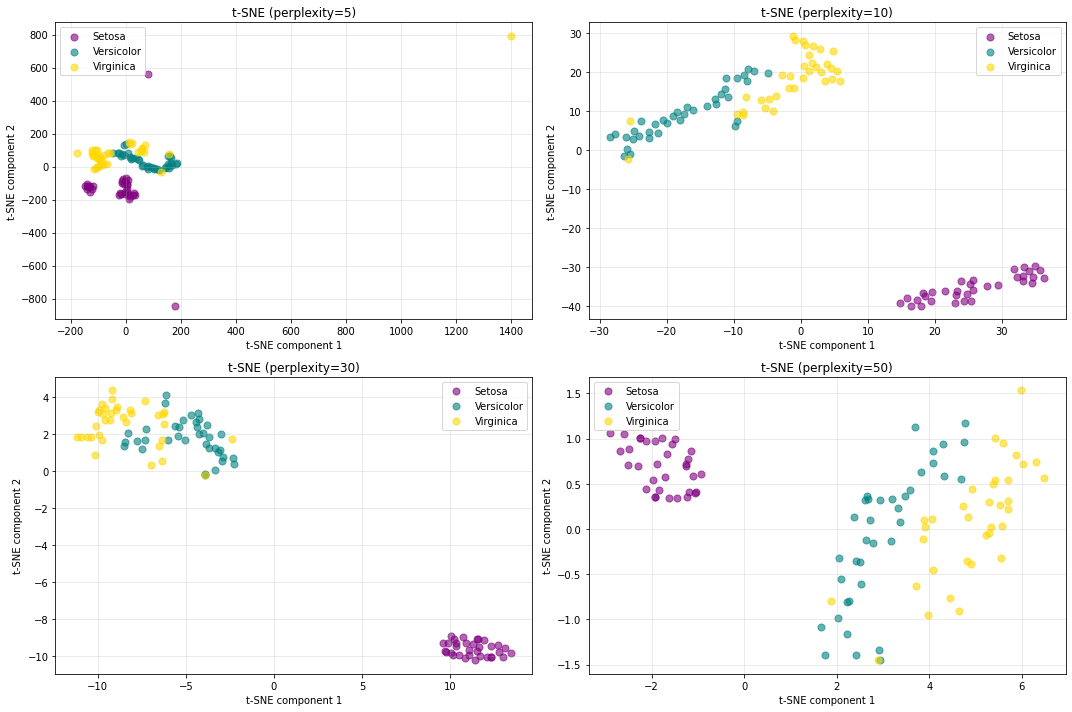

In [19]:
from sklearn.manifold import TSNE

perplexity_values = [5, 10, 30, 50]
plt.figure(figsize=(15, 10))

# Define class labels and colors
colors = ['purple', 'teal', 'gold']
labels = ['Setosa', 'Versicolor', 'Virginica']

for i, perplexity in enumerate(perplexity_values):
    print(f"Computing t-SNE with perplexity={perplexity}...")
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=16, 
                n_iter=1000, learning_rate=200)
    X_tsne = tsne.fit_transform(X_train_scaled)
    
    plt.subplot(2, 2, i+1)
    for cls, color, label in zip(np.unique(y_train), colors, labels):
        plt.scatter(
            X_tsne[y_train == cls, 0], X_tsne[y_train == cls, 1],
            c=color, label=label, alpha=0.6, s=50
        )

    plt.title(f't-SNE (perplexity={perplexity})')
    plt.xlabel('t-SNE component 1')
    plt.ylabel('t-SNE component 2')
    plt.grid(True, alpha=0.3)
    plt.legend()

plt.tight_layout()
plt.show()

### 3.5 UMAP: Modern Dimensionality Reduction

**UMAP (Uniform Manifold Approximation and Projection)** is a newer alternative to t-SNE:

### Advantages of UMAP:
- **Faster** than t-SNE for large datasets
- **Better at preserving global structure**
- **More stable** - less sensitive to hyperparameters
- **Scalable** to larger datasets

### Key Parameter - n_neighbors:
- **Low values (5-15)**: focus on local structure, more detailed clusters
- **High values (50+)**: preserve more global structure, broader patterns

Let's explore how different n_neighbors values affect our UMAP embeddings:

Computing UMAP with n_neighbors=5...
Computing UMAP with n_neighbors=15...
Computing UMAP with n_neighbors=30...
Computing UMAP with n_neighbors=50...


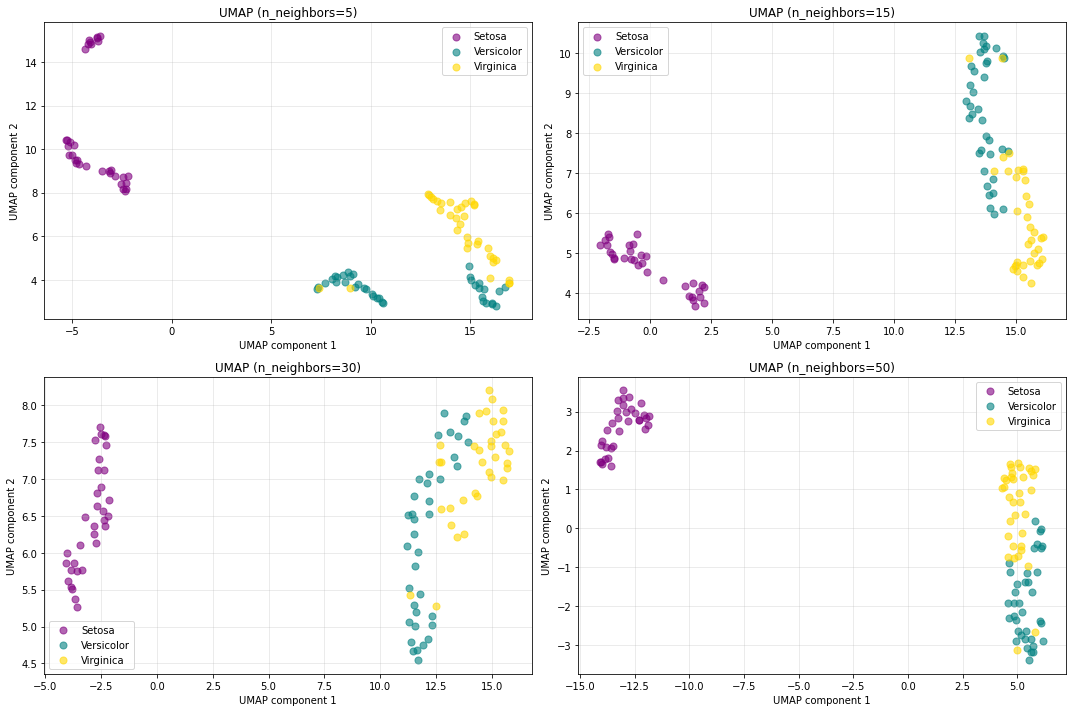

In [21]:
# Install UMAP if not already installed
import umap

# Create a color map manually
colors = ['purple', 'teal', 'gold']
labels = ['Setosa', 'Versicolor', 'Virginica']

# Perform UMAP with different n_neighbors values
n_neighbors_values = [5, 15, 30, 50]
plt.figure(figsize=(15, 10))

for i, n_neighbors in enumerate(n_neighbors_values):
    print(f"Computing UMAP with n_neighbors={n_neighbors}...")
    umap_model = umap.UMAP(n_neighbors=n_neighbors, random_state=100, 
                          n_components=2, min_dist=0.1, n_jobs=1)
    X_umap = umap_model.fit_transform(X_train_scaled)
    
    plt.subplot(2, 2, i+1)
    for cls, color, label in zip(np.unique(y_train), colors, labels):
        plt.scatter(
            X_umap[y_train == cls, 0], X_umap[y_train == cls, 1],
            c=color, label=label, alpha=0.6, s=50
        )
    plt.legend()
    plt.title(f'UMAP (n_neighbors={n_neighbors})')
    plt.xlabel('UMAP component 1')
    plt.ylabel('UMAP component 2')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()